In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt

/var/folders/gw/ltt3q7x963d_mt63_fcw5sx80000gn/T/ipykernel_75376/2880575945.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
data_dir = 'data'

In [4]:
os.listdir(os.path.join(data_dir,'happy'))

['images26.jpg',
 'images32.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 '05-12-21-happy-people.jpg',
 'image22.jpeg',
 'GettyImages-871518740-1024x707.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'how-happy-are-healthy-people.jpg',
 'physed-happiness-facebookJumbo.jpg',
 '170404-happy-workers-feature.jpg',
 'images33.jpg',
 'images27.jpg',
 'image18.jpeg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'images31.jpg',
 'images25.jpg',
 'Happy-people-raise-happy-kids-raise-yourself-first.jpg',
 'images19.jpg',
 'habits-that-define-very-happy-people.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 '1902587.jpg',
 'o-HAPPY-facebook.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 'happy-people-13772392.jpg',
 'images18.jpg',
 'images24.jpg',
 'images30.jpg',
 'image14.jpeg',
 'image15.jpeg',
 'young-and-happy-people-vector-15114154.jpg',
 'images34.jpg',
 'maxresdefault2.jpg',
 'images20.jpg',
 'bigstock-Portrait-Of

In [9]:
image_exts = ['jpeg','jpg','png','bmp']

In [11]:
count = 0
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path =  os.path.join(data_dir, image_class, image)
        try:
            count+=1
            img = cv2.imread (image_path)
            tip =  imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)
print(count)

305


In [23]:
tf.data.Dataset.list_files()

TypeError: DatasetV2.list_files() missing 1 required positional argument: 'file_pattern'

In [24]:
import numpy as np
from matplotlib import pyplot as plt

In [26]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


2024-02-03 09:57:05.135057: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-02-03 09:57:05.135187: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-02-03 09:57:05.135196: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-02-03 09:57:05.135601: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-03 09:57:05.136164: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [28]:
data_iterator = data.as_numpy_iterator()

In [29]:
batch = data_iterator.next()

In [31]:
#Images Represntate as Numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [32]:
batch[1]

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int32)

In [33]:
scaled = batch[0]/255

In [35]:
scaled.max()

1.0

In [38]:
#Preprocess Data

data = data.map(lambda x,y:(x/255,y))

In [39]:
scaled_iterator = data.as_numpy_iterator()

In [43]:
scaled_iterator.next()[0].max()

1.0

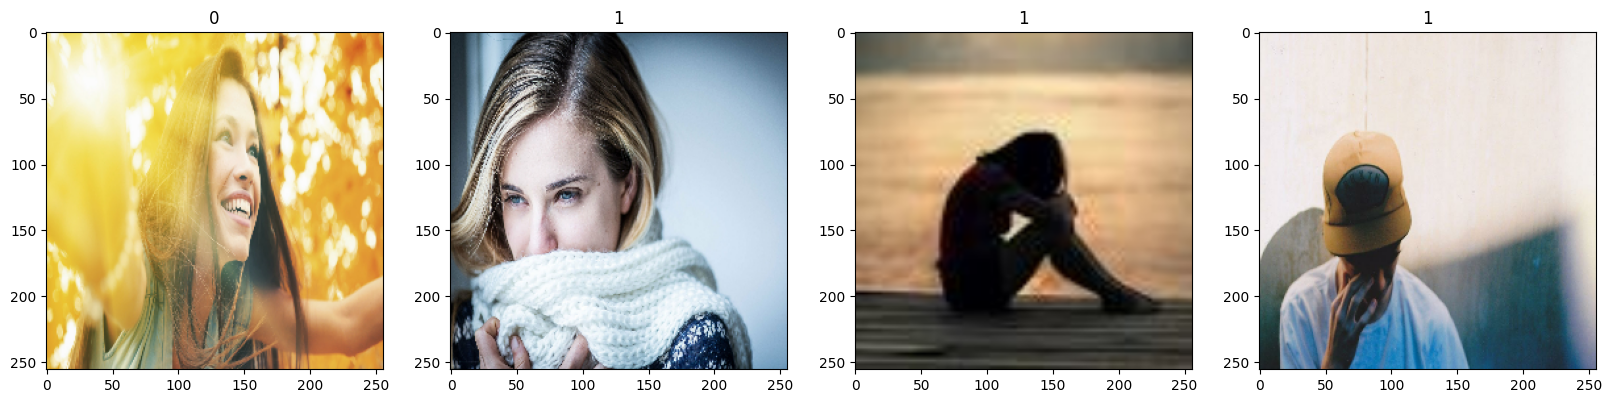

In [42]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [44]:
len(data)

10

In [45]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [50]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [52]:
model = Sequential()

In [53]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [56]:
logdr = 'logs'

In [57]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdr)

In [58]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20


2024-02-03 11:30:07.804520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 8s 351ms/step - loss: 0.9603 - accuracy: 0.5179 - val_loss: 0.6703 - val_accuracy: 0.5781
Epoch 2/20
7/7 [==============================] - 4s 363ms/step - loss: 0.6712 - accuracy: 0.5982 - val_loss: 0.6479 - val_accuracy: 0.7031
Epoch 3/20
7/7 [==============================] - 3s 307ms/step - loss: 0.6157 - accuracy: 0.7232 - val_loss: 0.5665 - val_accuracy: 0.6562
Epoch 4/20
7/7 [==============================] - 3s 305ms/step - loss: 0.5410 - accuracy: 0.7723 - val_loss: 0.6133 - val_accuracy: 0.7188
Epoch 5/20
7/7 [==============================] - 3s 306ms/step - loss: 0.6331 - accuracy: 0.7634 - val_loss: 0.5499 - val_accuracy: 0.7812
Epoch 6/20
7/7 [==============================] - 3s 317ms/step - loss: 0.5504 - accuracy: 0.6830 - val_loss: 0.5658 - val_accuracy: 0.6875
Epoch 7/20
7/7 [==============================] - ETA: 0s - loss: 0.4903 - accuracy: 0.7902

2024-02-03 11:30:51.093280: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 9 of 256
2024-02-03 11:30:52.322109: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


7/7 [==============================] - 20s 3s/step - loss: 0.4903 - accuracy: 0.7902 - val_loss: 0.5005 - val_accuracy: 0.8125
Epoch 8/20
7/7 [==============================] - 4s 334ms/step - loss: 0.3518 - accuracy: 0.9107 - val_loss: 0.2340 - val_accuracy: 0.9219
Epoch 9/20
7/7 [==============================] - 4s 331ms/step - loss: 0.3725 - accuracy: 0.8304 - val_loss: 0.3777 - val_accuracy: 0.7969
Epoch 10/20
7/7 [==============================] - 4s 341ms/step - loss: 0.2615 - accuracy: 0.9286 - val_loss: 0.2517 - val_accuracy: 0.9531
Epoch 11/20
7/7 [==============================] - 3s 310ms/step - loss: 0.1994 - accuracy: 0.9821 - val_loss: 0.1830 - val_accuracy: 0.9219
Epoch 12/20
7/7 [==============================] - 4s 328ms/step - loss: 0.1452 - accuracy: 0.9509 - val_loss: 0.1326 - val_accuracy: 0.9688
Epoch 13/20
7/7 [==============================] - 3s 307ms/step - loss: 0.1269 - accuracy: 0.9598 - val_loss: 0.0664 - val_accuracy: 1.0000
Epoch 14/20
7/7 [============

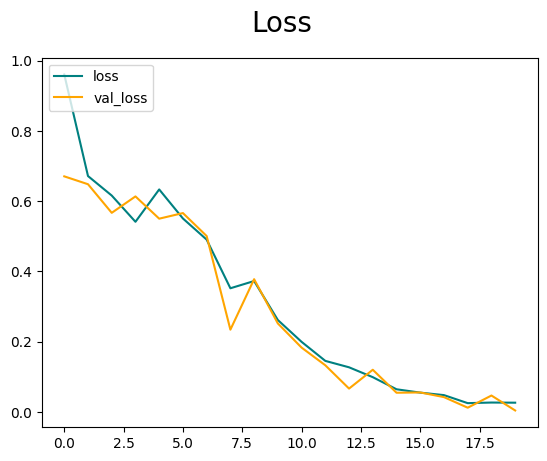

In [64]:
fig =  plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend (loc="upper left")
plt.show()

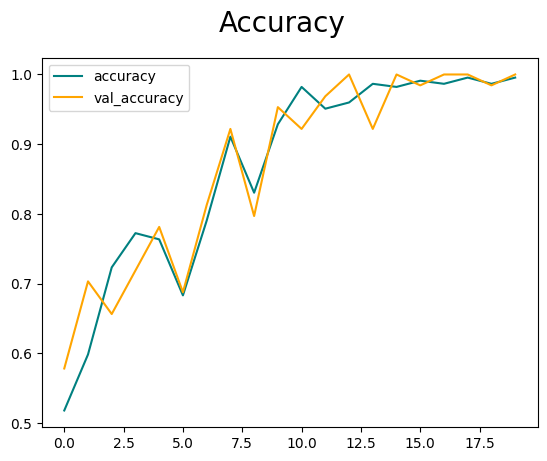

In [66]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend (loc="upper left")
plt.show()

In [67]:
from tensorflow.keras.metrics import Precision,Recall, BinaryAccuracy

In [68]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [71]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat =  model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 558ms/step


In [73]:
print(pre.result())
print(re.result())
print(acc.result())

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


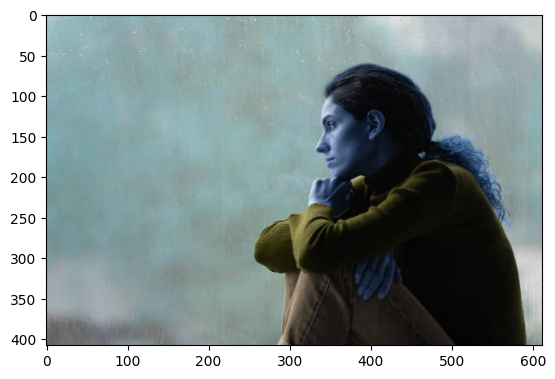

In [79]:
img = cv2.imread('istockphoto-1335296845-612x612.jpg')
plt.imshow(img)
plt.show()

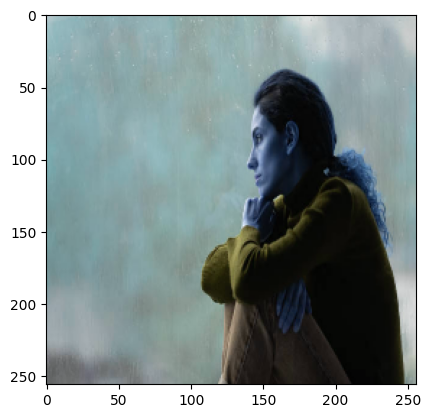

In [80]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [81]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 15ms/step


In [82]:
yhat

array([[0.8613092]], dtype=float32)

In [84]:
if yhat > 0.5:
    print("Person is Sad")
else:
    print("Person is Happy")

Person is Sad


In [85]:
from tensorflow.keras.models import load_model

In [86]:
model.save(os.path.join('models','imageClassfierMode.h5'))

/Users/parthramanuj/Desktop/30_Day_Chellenge/myenv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [87]:
new_model = load_model(os.path.join('models','imageClassfierMode.h5'))

In [88]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 156ms/step


array([[0.8613092]], dtype=float32)